# Part 1

## Q1

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style
import seaborn as sns
df = pd.read_csv('aviation_accident_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        23408 non-null  object 
 1   type        23933 non-null  object 
 2   operator    23963 non-null  object 
 3   fatalities  20029 non-null  float64
 4   country     23129 non-null  object 
 5   cat         23967 non-null  object 
 6   year        23906 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.3+ MB


there is 23967 entries in the dataframe

## 2

In [2]:
df.isna().sum()

date           559
type            34
operator         4
fatalities    3938
country        838
cat              0
year            61
dtype: int64

  in "date" column is 559 missing values

  in "type" column is 34 missing values
  
  in "operator" column is 4 missing values
  
  in "fatalities" column is 3938 missing values
  
  in "country " column is 838 missing values
  
  in "cat" column is 0 missing values
  
  in "year" column is 61 missing values        

## 3

In [3]:
type_count = df.groupby('type').size()
type_count[type_count >= 500]

type
Curtiss C-46A            564
Douglas C-47 (DC-3)      669
Douglas C-47A (DC-3)    1916
Douglas C-47B (DC-3)     592
dtype: int64

the types that have more then 500 accidents is Curtiss C-46A, Douglas C-47 (DC-3), Douglas C-47A (DC-3), Douglas C-47B (DC-3)

## 4

In [4]:
country_count = df.groupby('country').size()
total_count = len(df)
country_count['USA']/total_count

0.18262611090249092

18.26% of the accidents occurred in the United States

## 5

In [5]:
avg_fatalities_per_cat = df.groupby('cat')['fatalities'].mean()
avg_fatalities_per_cat

cat
A1     8.338233
A2     0.062728
C1     9.273478
C2     0.642857
H1    85.523810
H2     0.172710
I1     0.000000
I2     0.000000
O1     0.079533
O2     0.031250
U1     0.000000
Name: fatalities, dtype: float64

The most fatal accident type, on average, is H1

## 6

Text(0.5, 1.0, 'Distribution of fatalities in accidents by country in dealyest airplaens')

<Figure size 720x432 with 0 Axes>

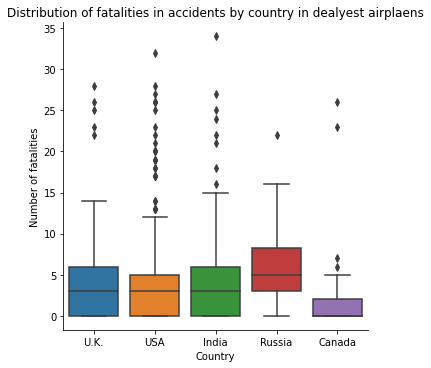

In [12]:
top_countries = df['country'].value_counts().head(5)
filtered = df[(df['country'].isin(top_countries.index)) & (df['type'].isin(type_count[type_count >= 500].index))]
plt.figure(figsize=(10, 6))
sns.catplot(x="country", y="fatalities", kind="box", data=filtered)
plt.xlabel("Country")
plt.ylabel("Number of fatalities")
plt.title("Distribution of fatalities in accidents by country in dealyest airplaens")

rusia is the country with the highest median of fatalities in the deadliest airplanes (over 500 dead per type)

## 7

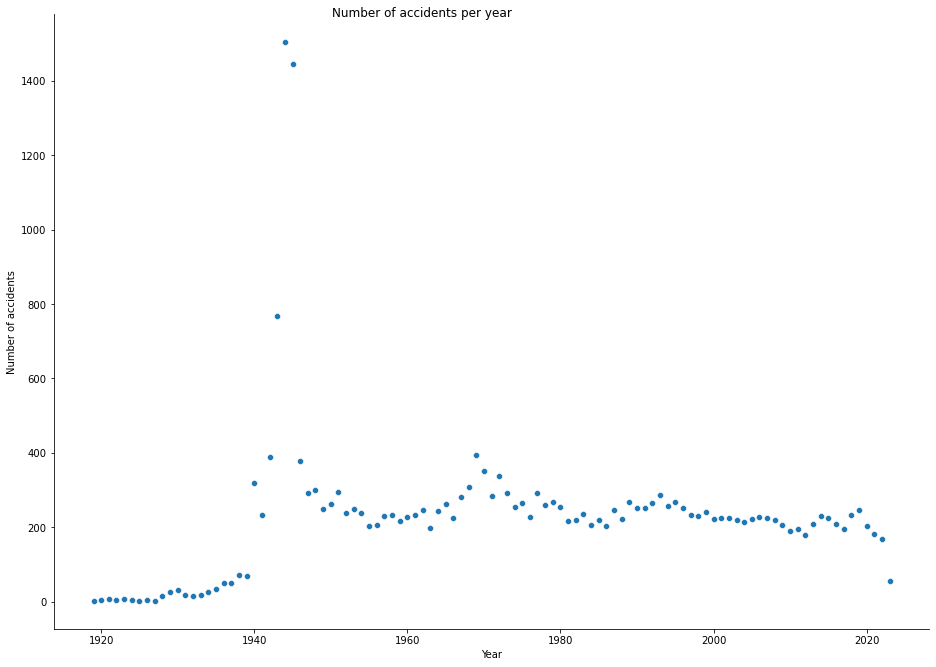

In [7]:
accidents_per_year = df.groupby(['year']).size()
accidents_per_year


sns_object = sns.relplot(y=accidents_per_year.values, x=accidents_per_year.index, marker='o')
sns_object.fig.set_size_inches(15,10) # set figure size
sns_object.fig.suptitle('Number of accidents per year') # set figure title
sns_object.set(xlabel='Year', ylabel='Number of accidents') # set axis labels

It can be concluded that there is no correspondence between the number of accidents each year and the year

## 8

In [8]:
types = df.groupby('type').size().sort_values(ascending=False).head(10)
types

type
Douglas C-47A (DC-3)         1916
Douglas C-47 (DC-3)           669
Douglas C-47B (DC-3)          592
Curtiss C-46A                 564
Junkers Ju-52/3m              471
Antonov An-2R                 391
Curtiss C-46D                 344
Douglas Dakota III (DC-3)     262
DHC-6 Twin Otter 300          258
Cessna 208B Grand Caravan     247
dtype: int64

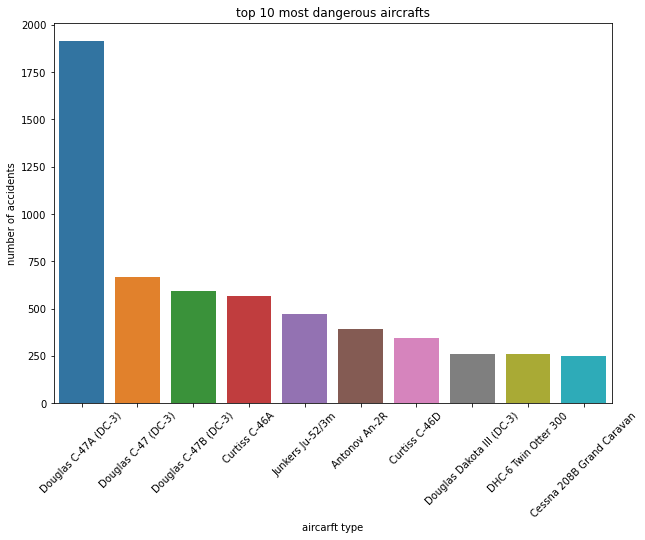

In [9]:
dangerous_types = df.groupby('type').size().sort_values(ascending=False).head(10)
bars = sns.barplot(x=dangerous_types.index, y=dangerous_types.values)
bars.set_xticklabels(bars.get_xticklabels(), rotation=45) # Rotate the x label ticks text by 45 degrees
bars.set_title('top 10 most dangerous aircrafts') # set figure title
bars.set(xlabel='aircarft type', ylabel='number of accidents') # ylim=[0, 1800]) # set y label
bars.figure.set_size_inches(10,7)

## 9

[Text(0, 0.5, 'number of accidents'), Text(0.5, 0, 'company name')]

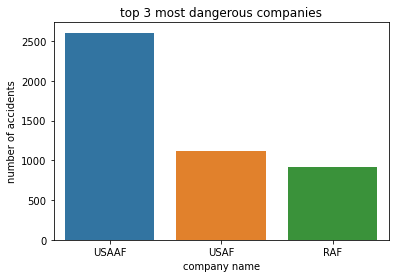

In [10]:
dangerous_company = df[df['type'].isin(dangerous_types.index)]['operator'].unique()
dangerous_df = df[df['operator'].isin(dangerous_company)]
operator_total_accidents = dangerous_df.groupby('operator').size().nlargest(3)

bars = sns.barplot(x=operator_total_accidents.index, y=operator_total_accidents.values)
bars.set_title('top 3 most dangerous companies')
bars.set(xlabel='company name', ylabel='number of accidents') 

## 10

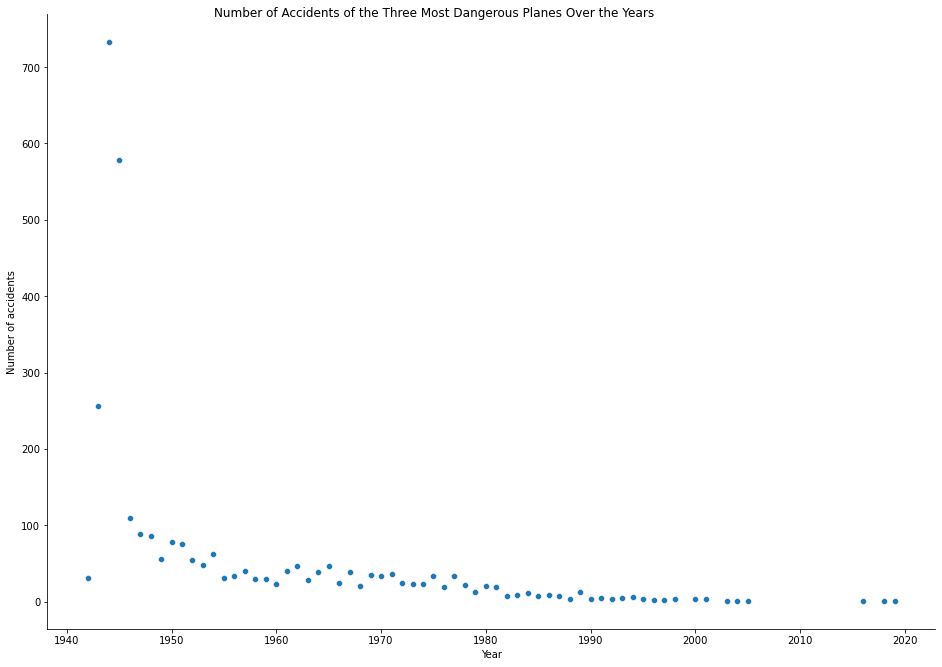

In [11]:
top_3_dangerous_types = type_count.nlargest(3)
dangerous_types_df = df[df['type'].isin(top_3_dangerous_types.index)]
accidents_per_year = dangerous_types_df.groupby('year').size()


sns_object = sns.relplot(y=accidents_per_year.values, x=accidents_per_year.index, marker='o')
sns_object.fig.set_size_inches(15,10) # set figure size
sns_object.fig.suptitle('Number of Accidents of the Three Most Dangerous Planes Over the Years') # set figure title
sns_object.set(xlabel='Year', ylabel='Number of accidents') # set axis labels

א. מספר התאונות של המטוסים המסוכנים פוחת במשך השנים. סיבה אחת יכולה להיות כי המטוסים המסוכנים יצאו משימוש מכיוון שהם מסוכנים סיבה נוספת יכולה להיות כי לאחר תאונות רבות שהתרחשו במטוסים אלו, היה הרבה מידע להפיק ממנו לקחים שאפשר לחדד את נהלי הטיסה והתחזוקה שהוביל לירדיה במספר התאונות.

ב. קיימות תצפיות חריגות בשנים 1943-1945, ייתכן כי מטוסים אלו היו בשימוש רב במלחמת העולם השניה ובמהלך המלחמה הופלו/התרסקו מטוסים רבים ולכן התאונות הרבות בשנים אלו

# part 2

In [23]:
np.set_printoptions(threshold=6, formatter={'float': lambda x: "{0:0.2f}".format(x)})

## 1

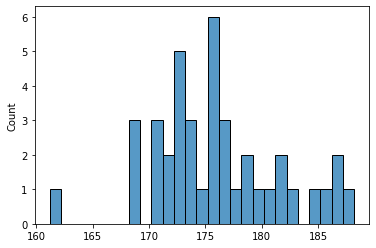

In [24]:
mean_hight_cm = 175
SD_hight_cm = 6
n = 40 

hight_samples = np.random.normal(mean_hight_cm, SD_hight_cm, n)
sns.histplot(data = hight_samples, binwidth =1)


a) the distribution that we have here is a probability distribution, because it is based on probability, and not on observed data like empirical distributions.

b) the heights mean that we got in this sample is: 175.92351807701115

In [26]:
mean_hight_cm = np.mean(hight_samples)
mean_hight_cm

175.92351807701115

c) for this sample and the bin size that was chosen, the graphs skewness right-skewed, and its modality is multimodal.
if the sample size was larger, lest say n=1000, will expect the skewness to be symmetrical and the modality to be unimodal.


## 2

a)	H0 will be - the mean height of the puplsion that the sample was taken from is 175cm. H1 will be - the mean height of the puplsion that the sample was taken from is lower than 175cm. 


b)	 we will check our hypothesis by simulating the original sample whit the calculated height mean and SD=6 2000 times:



In [6]:
# sample one value
def sample_mean_hight(mean_hight_cm):
    hight_sample = np.random.normal(mean_hight_cm, SD_hight_cm, 40)
    return np.mean(hight_sample)

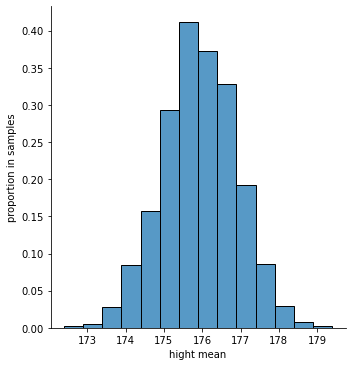

In [27]:
# run multiple simulations
num_repetitions = 2000
samples = np.empty(num_repetitions) # collection array
for i in range(num_repetitions):
    samples[i] = sample_mean_hight(mean_hight_cm)

    
# plot the empirical distribution of the statistic
ax = sns.displot(samples, stat="density", binwidth =0.5)
ax.set(xlabel='hight mean', ylabel='proportion in samples');

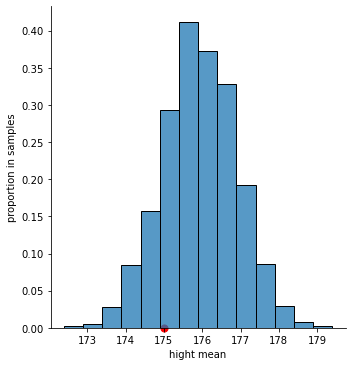

In [28]:
# plot the empirical distribution of the statistic
ax = sns.displot(samples, stat="density",binwidth =0.5)
ax.set(xlabel='hight mean', ylabel='proportion in samples');

# Add a red point on the plot marking our data
plt.scatter(175, 0, marker='.', s=200, color='red', clip_on=False)
plt.show()

c) the p-value that we get is:

In [29]:
count_fewer_than_175 = np.count_nonzero(samples < 175)
print ('The p-value is', count_fewer_than_175/len(samples))

The p-value is 0.165


d) for both the level of significance is 0.1 and 0.01 we can see that the p-value is over the requested level of significance, and we can not reject H0.

## 3

In [2]:
def get_p_value_heights(sample_heights,n,mean_0):
    mean_sample_heights = np.mean(sample_heights)
    
    # run multiple simulations
    num_repetitions = 2000
    samples = np.empty(num_repetitions) # collection array
    for i in range(num_repetitions):
        samples[i] = sample_mean_hight(mean_sample_heights)
    
    count_fewer_than_mean_0 = np.count_nonzero(samples < mean_0)
    p_value = (count_fewer_than_mean_0/len(samples))
    return p_value

## 4

In [7]:
SD_hight_cm = 6
n = 40
mean_hieght = 175

num_repetitions = 5000
p_values = np.empty(num_repetitions) # collection array
for i in range(num_repetitions):
    hight_samples = np.random.normal(mean_hieght, SD_hight_cm, n)
    mean_0 = hight_samples.mean()
    p_value = get_p_value_heights(hight_samples, n, mean_0)
    p_values[i] = p_value


a) we will expect to see a sort of normal distribution around 0.5. we expect to see this because that over a lot of simulations, we think that most of the samples mean height will be very close to 175cm, because that is the population average. so, after simulating the sample over 2000 times for etch sample, we expect to get a p-value that represent the population average.

b)

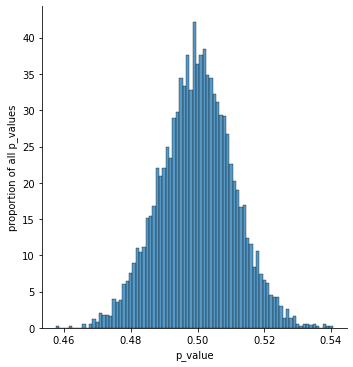

In [36]:
# plot the empirical distribution of the p_values
ax = sns.displot(p_values, stat="density", binwidth =0.001)
ax.set(xlabel='p_value', ylabel='proportion of all p_values');

c) the distribution is unimodal and center-skewed. it is as what we origanly thoght.

In [10]:
count_fewer_than_005 = np.count_nonzero(p_values < 0.05)
print ('The p-value is', count_fewer_than_005/len(p_values))

The p-value is 0.0


d) there are 0% value that are less than 0.05. that is because that the p-value counts the anomaly in the data, and after many samples and simulations, we will get pretty accurate data.

## 5

even if we will change the sample size to 200, we will get a similar resulted, because in both instances we repeat the test 5000 times

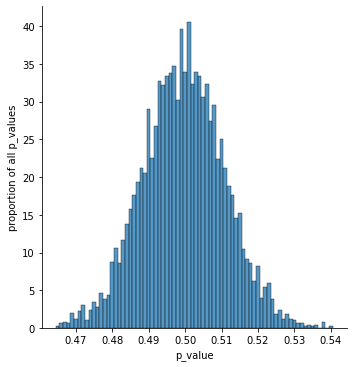

In [18]:
SD_hight_cm = 6
n = 200
mean_hieght = 175

num_repetitions = 5000
p_values_2 = np.empty(num_repetitions) # collection array
for i in range(num_repetitions):
    hight_samples = np.random.normal(mean_hieght, SD_hight_cm, 200)
    mean_0 = hight_samples.mean()
    p_value = get_p_value_heights(hight_samples, 200, mean_0)
    p_values_2[i] = p_value
    
# plot the empirical distribution of the p_values
ax = sns.displot(p_values_2, stat="density", binwidth =0.001)
ax.set(xlabel='p_value', ylabel='proportion of all p_values');

In [16]:
p_values_2

array([0.508 , 0.4975, 0.5065, ..., 0.4945, 0.504 , 0.481 ])